<a href="https://colab.research.google.com/github/kelgruber/bear-cnn-classification/blob/main/Kel_Gruber_Practice_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practice Project Task 4 Effects of Regularization

Kel Gruber

## Dataset - Bears Classification
Goal is to classify images of grizzly, panda, and polar bears.
Dataset was created by Shaney Flores and consists of over 1000 digital colored images of grizzly, panda, and polar bears were downloaded from an Internet image search.
Dataset can be found and downloaded from [Shaney Flores's Github](https://github.com/shaneyflores/Classifying-Bear-Species-DL/blob/main/bears_ws.zip).

##1. Load Dataset and Preview Images
For reproducibility the dataset has been split before we begin into 3 sets, the training, validation and testing sets. The training set contains approximately 60% of the data, and the validation and testing sets each contain 20% of the data.

### Import libaries and connect to Drive

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Import Dataset from Drive and Unzip

In [ ]:
import zipfile
import os
zip_train = zipfile.ZipFile('/content/drive/MyDrive/Bears Classification/bears_ws.zip')
zip_train.extractall('/tmp')
zip_train.close()

###Import Training, Validation, and Testing Datasets

In [ ]:
image_generator = ImageDataGenerator(rescale=1./255)

training_data = image_generator.flow_from_directory( '/tmp/bears/training', target_size=(256, 256), batch_size=1, class_mode='categorical')
print(training_data.image_shape)

validation_set = image_generator.flow_from_directory( '/tmp/bears/validation', target_size=(256, 256), batch_size=1, class_mode='categorical')
print(validation_set.image_shape)

testing_set = image_generator.flow_from_directory( '/tmp/bears/test', target_size=(256, 256), batch_size=1, class_mode='categorical')
print(testing_set.image_shape)

Found 718 images belonging to 3 classes.
(256, 256, 3)
Found 240 images belonging to 3 classes.
(256, 256, 3)
Found 240 images belonging to 3 classes.
(256, 256, 3)


###View Some Examples from the Training Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

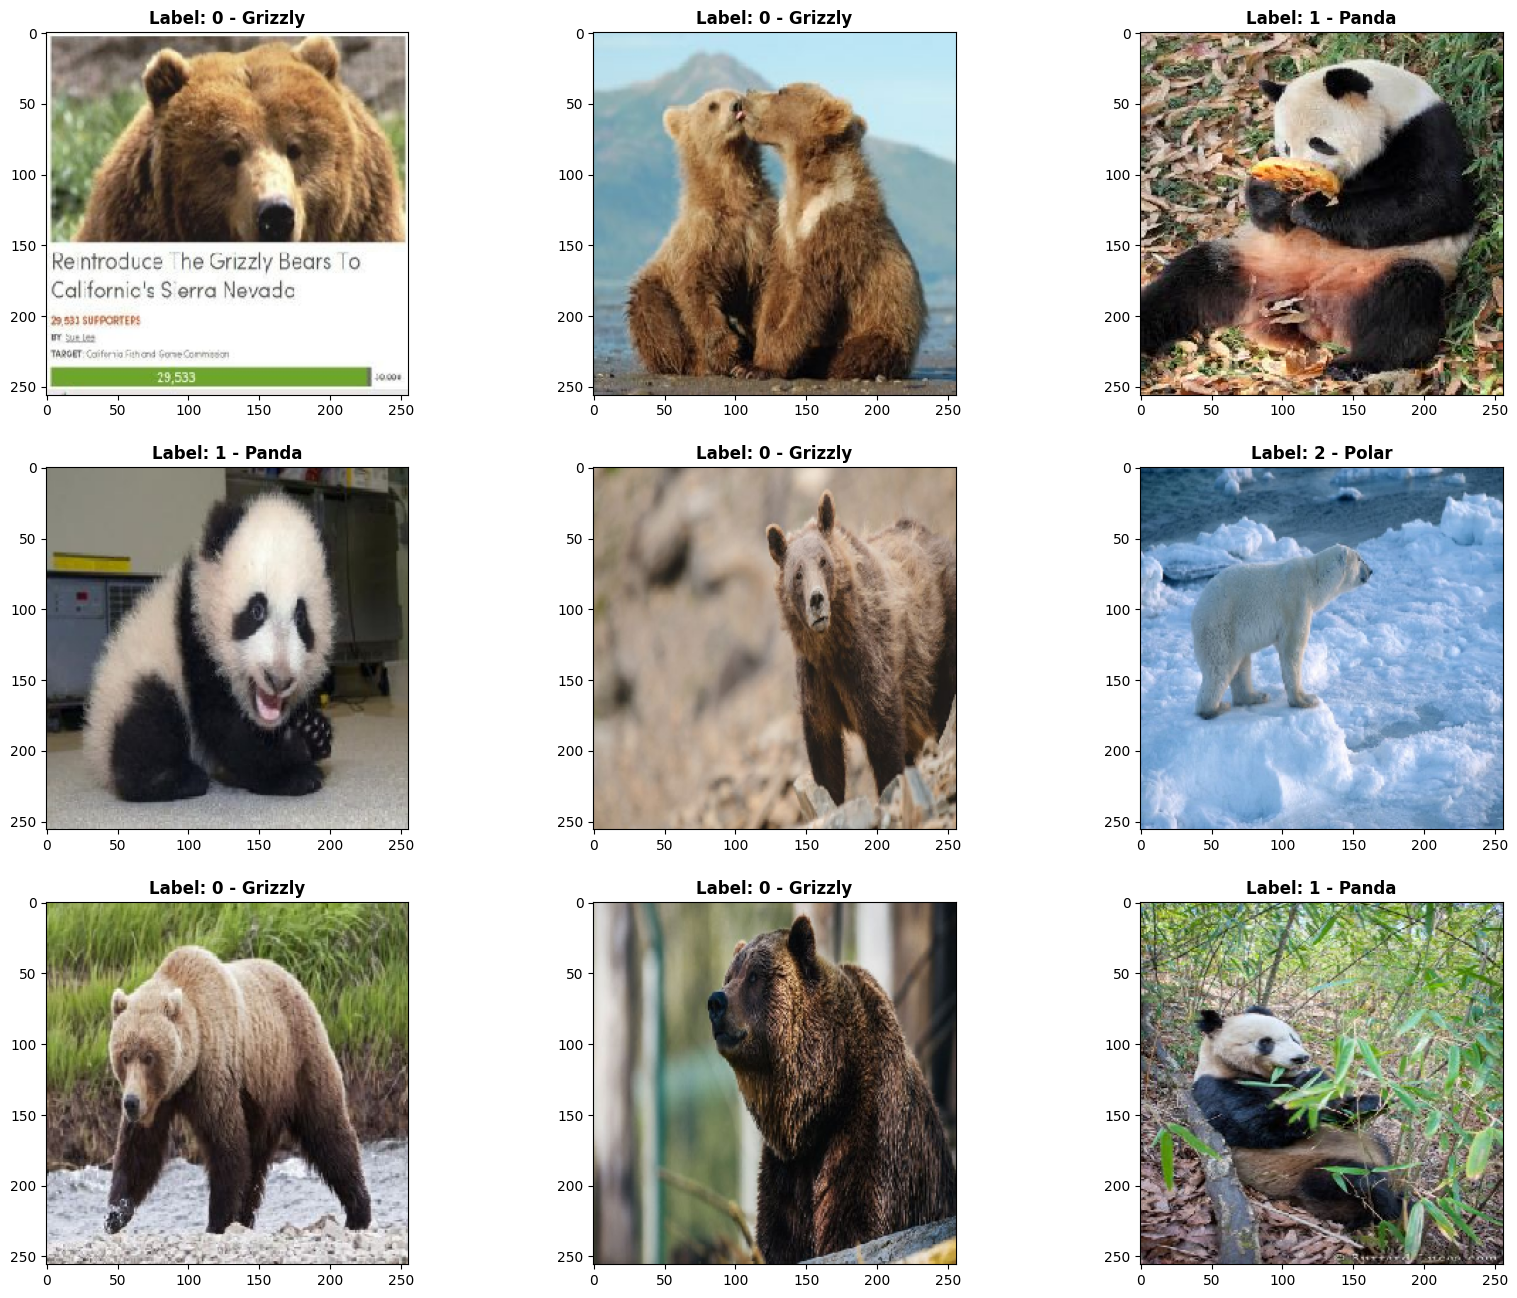

In [ ]:
label_category = {0: "Grizzly", 1: "Panda", 2: "Polar"}

images = []
labels = []
for i in range(9):
    image, label = next(training_data)
    images.append(image)
    labels.append(label)

labels = np.array(labels)
labels = np.squeeze(labels)
labels = np.argmax(labels, axis=1)
labels = list(labels)

# Plotting the images
plt.figure(figsize=(20,16))
for i in range(0,9):
    row = i // 3  # Calculate row index
    column = i % 3  # Calculate column index
    plt.subplot(3, 3, i + 1)
    plt.title(f'Label: {labels[i]} - {label_category[labels[i]]}',fontweight='bold')
    plt.imshow(images[i].squeeze())
plt.show()

##2. Applying Different Regularization Techniques

Our goal in this phase is to improve the best model from Phase 2, Model 3 which had a 90% accuracy on the testing set. We will try to improve the model's accuracy on the validation set by using different regularization techniques like batch normalization, dropout, and L2 regularization.

Initial Model Structure:
- 3 Convolutional layers with 64, 32 and 16 kernels, each using a relu activation function
- 2 MaxPool layers that follow the first and second convolutional layers with (9,9) and (7,7) pooling windows
- 1 Flatten Layer after the 3rd convolutional layer
- 1 Dense layer with 3 neurons using a softmax activation function


###2.1 Experiment 1: Applying Batch Normalization

Model Structure:
- 3 Convolutional layers with 64, 32 and 16 kernels, each using a relu activation function
- 2 MaxPool layers that follow the first and second convolutional layers with (9,9) and (7,7) pooling windows
- 2 Batch Normalization Layers after the 1st and 2nd MaxPool layers
- 1 Flatten Layer after the 3rd convolutional layer
- 1 Dense layer with 3 neurons using a softmax activation function


####Build Model

In [ ]:
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import BatchNormalization, Dropout

In [ ]:
model_1 = Sequential()

model_1.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape = training_data.image_shape))
model_1.add(layers.MaxPooling2D((9, 9)))
model_1.add( BatchNormalization())
model_1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((7, 7)))
model_1.add( BatchNormalization())
model_1.add(layers.Conv2D(16, (3, 3), activation='relu'))
model_1.add( Flatten() )
model_1.add( Dense(3, activation = 'softmax' ) )

model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_7 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                            
                                                      

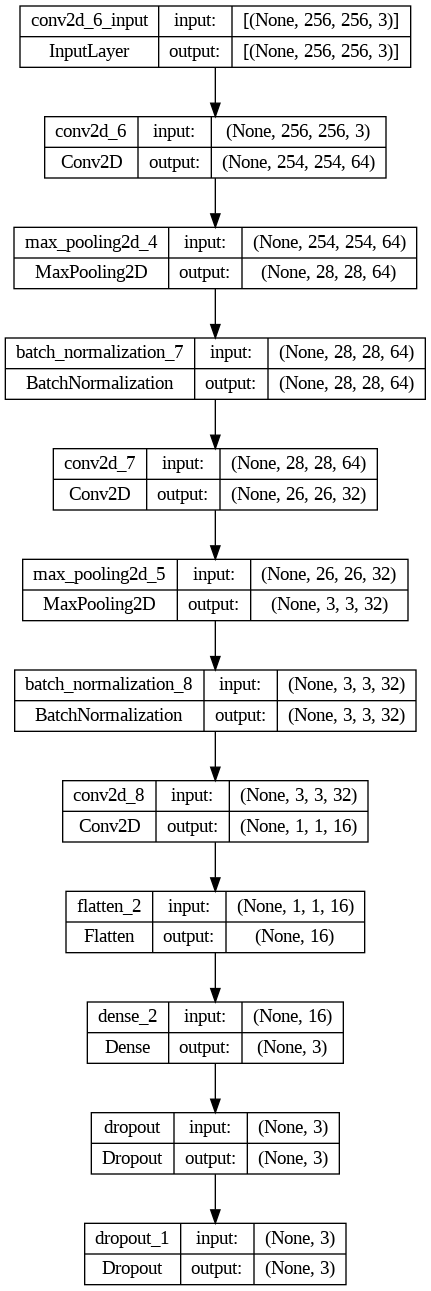

In [ ]:
tf.keras.utils.plot_model(model_1, show_layer_names=True, show_shapes=True)

####Train Model

In [ ]:
callback_a = ModelCheckpoint(filepath = 'model_1_best.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience = 20, verbose=1)
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history1 = model_1.fit(training_data, validation_data = validation_set, epochs = 100, batch_size = 64, callbacks = [callback_a, callback_b])

Epoch 1/100
711/718 [============================>.] - ETA: 0s - loss: 0.9202 - accuracy: 0.5963
Epoch 1: val_loss improved from inf to 0.92870, saving model to model_1_best.hdf5
718/718 [==============================] - 14s 12ms/step - loss: 0.9185 - accuracy: 0.5975 - val_loss: 0.9287 - val_accuracy: 0.5667
Epoch 2/100
717/718 [============================>.] - ETA: 0s - loss: 0.6373 - accuracy: 0.7266
Epoch 2: val_loss improved from 0.92870 to 0.72995, saving model to model_1_best.hdf5
718/718 [==============================] - 12s 17ms/step - loss: 0.6366 - accuracy: 0.7270 - val_loss: 0.7299 - val_accuracy: 0.7167
Epoch 3/100
711/718 [============================>.] - ETA: 0s - loss: 0.4325 - accuracy: 0.8368
Epoch 3: val_loss did not improve from 0.72995
718/718 [==============================] - 8s 11ms/step - loss: 0.4312 - accuracy: 0.8370 - val_loss: 0.9044 - val_accuracy: 0.5917
Epoch 4/100
715/718 [============================>.] - ETA: 0s - loss: 0.3288 - accuracy: 0.8783

####View Learning Curves

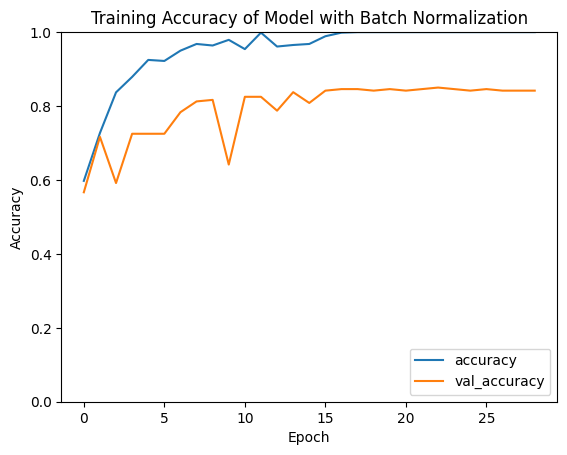

In [ ]:
plt.title('Training Accuracy of Model with Batch Normalization')
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

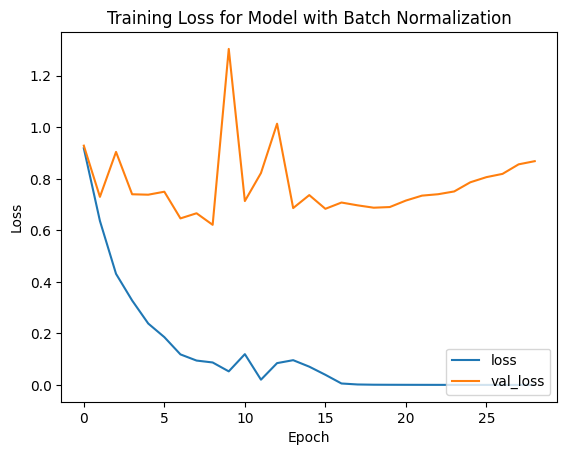

In [ ]:
plt.title('Training Loss for Model with Batch Normalization')
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model_1.load_weights('model_1_best.hdf5')

####Evaluate Model

In [ ]:
val_loss, val_acc = model_1.evaluate(validation_set)

print(f'Accuracy: {val_acc*100.0}')
print(f'Loss:{val_loss}')

240/240 [==============================] - 1s 5ms/step - loss: 0.6214 - accuracy: 0.8167
Accuracy: 81.66666626930237
Loss:0.6214076280593872


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Get predictions from model
P = [] # empty list of predictions
Y_true = []
for i in range(len(validation_set)):
   x, y = validation_set.next()
   p = model_1.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8166666666666667
Precision: 0.8183892702771421
Recall: 0.8166666666666667
F1 Score: 0.8163086453141701


####Conclusion


###2.2 Experiment 2: Adding Dropout Layers

Model Structure:
- 3 Convolutional layers with 64, 32 and 16 kernels, each using a relu activation function
- 2 MaxPool layers that follow the first and second convolutional layers with (9,9) and (7,7) pooling windows
- 2 Dropout Layers after the 1st and 2nd MaxPool layers
- 1 Flatten Layer after the 3rd convolutional layer
- 1 Dense layer with 3 neurons using a softmax activation function


####Build Model

In [ ]:
model_2 = Sequential()

model_2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape = training_data.image_shape))
model_2.add(layers.MaxPooling2D((9, 9)))
model_1.add( Dropout(rate=0.2))
model_2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((7, 7)))
model_1.add( Dropout(rate=0.2))
model_2.add(layers.Conv2D(16, (3, 3), activation='relu'))
model_2.add( Flatten() )
model_2.add( Dense(3, activation = 'softmax' ) )

model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 1, 1, 16)          4624      
                                                                 
 flatten_3 (Flatten)         (None, 16)               

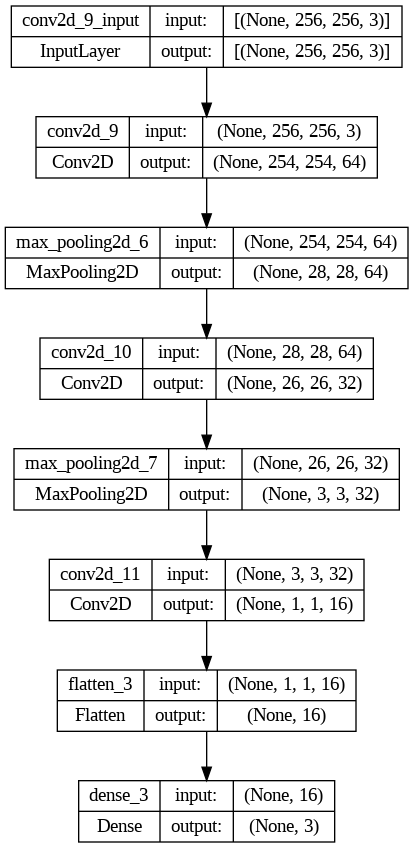

In [ ]:
tf.keras.utils.plot_model(model_2, show_layer_names=True, show_shapes=True)

####Train Model

In [ ]:
callback_a = ModelCheckpoint(filepath = 'model_2_best.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience = 20, verbose=1)
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history2 = model_2.fit(training_data, validation_data = validation_set, epochs = 100, batch_size = 64, callbacks = [callback_a, callback_b])

Epoch 1/100
716/718 [============================>.] - ETA: 0s - loss: 0.8909 - accuracy: 0.5140
Epoch 1: val_loss improved from inf to 0.78845, saving model to model_2_best.hdf5
718/718 [==============================] - 13s 15ms/step - loss: 0.8905 - accuracy: 0.5139 - val_loss: 0.7884 - val_accuracy: 0.6167
Epoch 2/100
717/718 [============================>.] - ETA: 0s - loss: 0.6318 - accuracy: 0.7071
Epoch 2: val_loss improved from 0.78845 to 0.58755, saving model to model_2_best.hdf5
718/718 [==============================] - 9s 12ms/step - loss: 0.6318 - accuracy: 0.7075 - val_loss: 0.5875 - val_accuracy: 0.8250
Epoch 3/100
717/718 [============================>.] - ETA: 0s - loss: 0.4731 - accuracy: 0.8103
Epoch 3: val_loss improved from 0.58755 to 0.43809, saving model to model_2_best.hdf5
718/718 [==============================] - 9s 13ms/step - loss: 0.4744 - accuracy: 0.8092 - val_loss: 0.4381 - val_accuracy: 0.8208
Epoch 4/100
712/718 [============================>.] - ETA

####View Learning Curves

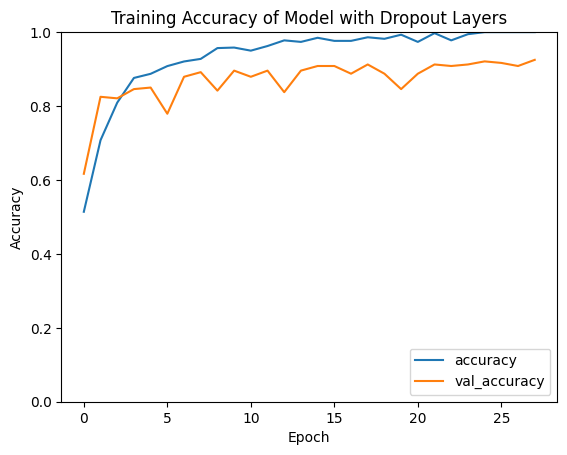

In [ ]:
plt.title('Training Accuracy of Model with Dropout Layers')
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

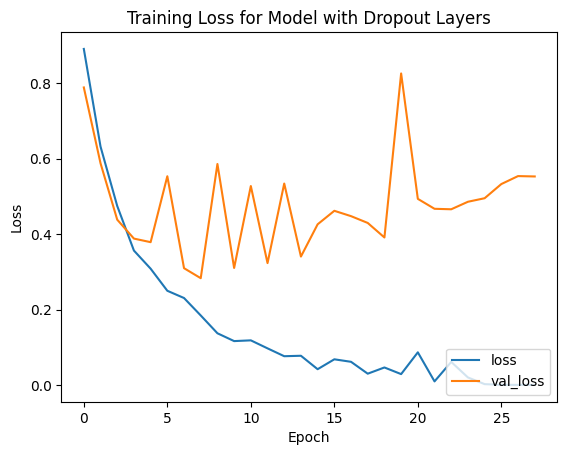

In [ ]:
plt.title('Training Loss for Model with Dropout Layers')
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

####Evaluate Model

In [ ]:
model_2.load_weights('model_2_best.hdf5')

In [ ]:
val_loss, val_acc = model_2.evaluate(validation_set)

print(f'Accuracy: {val_acc*100.0}')
print(f'Loss:{val_loss}')

240/240 [==============================] - 1s 5ms/step - loss: 0.2830 - accuracy: 0.8917
Accuracy: 89.16666507720947
Loss:0.2830306887626648


In [ ]:
# Get predictions from model
P = [] # empty list of predictions
Y_true = []
for i in range(len(validation_set)):
   x, y = validation_set.next()
   p = model_2.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8916666666666667
Precision: 0.8953633994059528
Recall: 0.8916666666666667
F1 Score: 0.8917151165196207


####Conclusion


###2.3 Experiment 3: Using L2 Regularization


Model Structure:
- 3 Convolutional layers with 64, 32 and 16 kernels, each using a relu activation function and L2 Regularization
- 2 MaxPool layers that follow the first and second convolutional layers with (9,9) and (7,7) pooling windows
- 1 Flatten Layer after the 3rd convolutional layer
- 1 Dense layer with 3 neurons using a softmax activation function


####Build Model

In [ ]:
model_3 = Sequential()

model_3.add(layers.Conv2D(64, (3, 3), kernel_regularizer="l2", activation='relu', input_shape = training_data.image_shape))
model_3.add(layers.MaxPooling2D((9, 9)))
model_3.add(layers.Conv2D(32, (3, 3), kernel_regularizer="l2", activation='relu'))
model_3.add(layers.MaxPooling2D((7, 7)))
model_3.add(layers.Conv2D(16, (3, 3), kernel_regularizer="l2", activation='relu'))
model_3.add( Flatten() )
model_3.add( Dense(3, activation = 'softmax' ) )

model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        18464     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 1, 1, 16)          4624      
                                                                 
 flatten_4 (Flatten)         (None, 16)               

####Train Model

In [ ]:
callback_a = ModelCheckpoint(filepath = 'model_3_best.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience = 20, verbose=1)
model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history3 = model_3.fit(training_data, validation_data = validation_set, epochs = 100, batch_size = 64, callbacks = [callback_a, callback_b])

Epoch 1/100
713/718 [============================>.] - ETA: 0s - loss: 1.1044 - accuracy: 0.5624
Epoch 1: val_loss improved from inf to 0.86610, saving model to model_3_best.hdf5
718/718 [==============================] - 9s 10ms/step - loss: 1.1020 - accuracy: 0.5641 - val_loss: 0.8661 - val_accuracy: 0.6167
Epoch 2/100
715/718 [============================>.] - ETA: 0s - loss: 0.8062 - accuracy: 0.6839
Epoch 2: val_loss improved from 0.86610 to 0.73221, saving model to model_3_best.hdf5
718/718 [==============================] - 7s 10ms/step - loss: 0.8062 - accuracy: 0.6838 - val_loss: 0.7322 - val_accuracy: 0.7917
Epoch 3/100
708/718 [============================>.] - ETA: 0s - loss: 0.6680 - accuracy: 0.7867
Epoch 3: val_loss improved from 0.73221 to 0.61891, saving model to model_3_best.hdf5
718/718 [==============================] - 6s 8ms/step - loss: 0.6624 - accuracy: 0.7897 - val_loss: 0.6189 - val_accuracy: 0.8167
Epoch 4/100
710/718 [============================>.] - ETA: 

####View Learning Curves

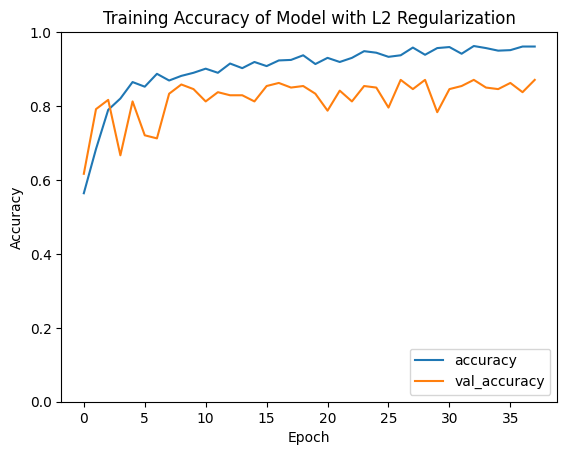

In [ ]:
plt.title('Training Accuracy of Model with L2 Regularization')
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

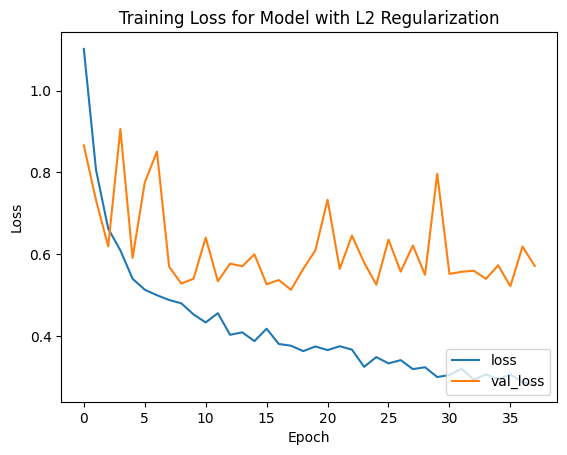

In [ ]:
plt.title('Training Loss for Model with L2 Regularization')
plt.plot(history3.history['loss'], label='loss')
plt.plot(history3.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

####Evaluate Model

In [ ]:
model_3.load_weights('model_3_best.hdf5')

In [ ]:
val_loss, val_acc = model_3.evaluate(validation_set)

print(f'Accuracy: {val_acc*100.0}')
print(f'Loss:{val_loss}')

240/240 [==============================] - 1s 6ms/step - loss: 0.5127 - accuracy: 0.8500
Accuracy: 85.00000238418579
Loss:0.5126621127128601


In [ ]:
# Get predictions from model
P = [] # empty list of predictions
Y_true = []
for i in range(len(validation_set)):
   x, y = validation_set.next()
   p = model_3.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.85
Precision: 0.8541241620518799
Recall: 0.85
F1 Score: 0.8508543417366946


####Conclusion


##3. Conclusion

